In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [57]:
#log_dir = '/neurospin/dico/jlaval/Output/2024-10-15/15-35-05_117/log_output.log'
#log_dir = '/neurospin/dico/jlaval/Output/2024-10-15/16-03-47_195/log_output.log'
#log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/09-56-56_7/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-25-12_57/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-29-17_145/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-35-52_60/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-42-00_14/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/FIP_visu_vx_removed_cutout/10-51-48_52/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/10-58-18_79/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/13-42-57_199/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/13-44-00_40/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/orbital_masked_cutout/10-58-18_79/log_output.log'
## mixed augms
## we are interested in the bottoms too
log_dir = '/neurospin/dico/jlaval/Output/2024-11-25/16-27-46_166/log_output.log' # keep bottom 100%
log_dir = '/neurospin/dico/jlaval/Output/2024-11-25/16-30-59_42/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-25/16-33-32_254/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-25/16-35-52_231/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-11-25/16-45-11_191/log_output.log'


In [58]:
data = pd.read_csv(log_dir, delimiter = ",", header = None, skiprows=9)
data.columns=['cutout', 'nb_vx', 'nb_vx_after', 'nb_vx_without_bottoms', 'nb_vx_after_without_bottoms']
print(data)
print(data.head())

                              cutout  nb_vx  nb_vx_after  \
0        INFO:augmentations.py: True  551.0        475.0   
1        INFO:augmentations.py: True  502.0        413.0   
2       INFO:augmentations.py: False  629.0        375.0   
3        INFO:augmentations.py: True  686.0        564.0   
4       INFO:augmentations.py: False  616.0        205.0   
...                              ...    ...          ...   
3571    INFO:augmentations.py: False  544.0        152.0   
3572    INFO:augmentations.py: False  489.0        221.0   
3573    INFO:augmentations.py: False  663.0        267.0   
3574     INFO:augmentations.py: True  663.0        608.0   
3575  INFO:train.py: Fitting is done    NaN          NaN   

      nb_vx_without_bottoms  nb_vx_after_without_bottoms  
0                     444.0                        377.0  
1                     357.0                        280.0  
2                     504.0                        271.0  
3                     580.0                

In [59]:
l = data['cutout'].tolist()
data['cutout'] = [elem[-5:] for elem in l]

In [60]:
# for cutout
data_cutout = data.loc[data['cutout']==' True']
np.mean(data_cutout['nb_vx']), np.mean(data_cutout['nb_vx_without_bottoms']), np.mean(data_cutout['nb_vx_after_without_bottoms'])

(577.8944134078213, 453.57765363128493, 349.10111731843574)

In [61]:
# for cutin
data_cutin = data.loc[data['cutout']=='False']
np.mean(data_cutin['nb_vx']), np.mean(data_cutin['nb_vx_without_bottoms']), np.mean(data_cutin['nb_vx_after_without_bottoms'])

(581.0, 456.56638655462183, 157.97703081232493)

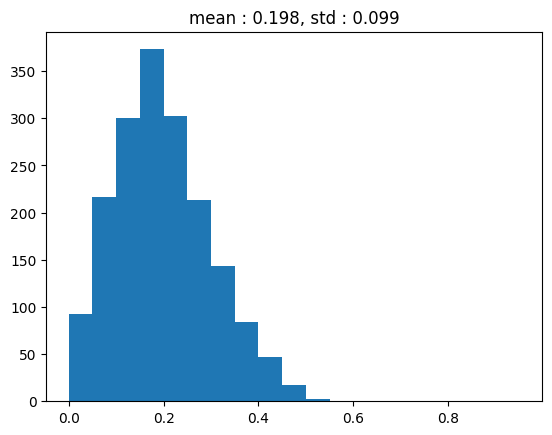

In [62]:
## plot the distributions of the proportion of non 30 vx removed
# cutout
l_before = data_cutout['nb_vx'].tolist()
l_after = data_cutout['nb_vx_after'].tolist()
removed_cutout = [(before - after) / before for before, after in zip(l_before, l_after)]
plt.hist(removed_cutout, bins=np.arange(0,1,0.05))
plt.title(f"mean : {np.mean(removed_cutout):.3f}, std : {np.std(removed_cutout):.3f}")
plt.show()

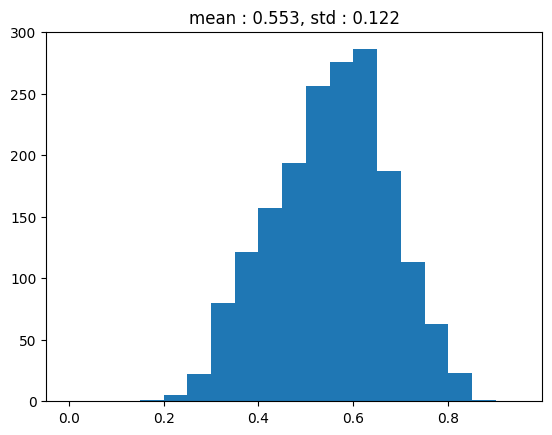

In [63]:
# cutin
l_before = data_cutin['nb_vx'].tolist()
l_after = data_cutin['nb_vx_after'].tolist()
removed_cutin = [(before - after) / before for before, after in zip(l_before, l_after)]
plt.hist(removed_cutin, bins=np.arange(0,1,0.05))
plt.title(f"mean : {np.mean(removed_cutin):.3f}, std : {np.std(removed_cutin):.3f}")
plt.show()